___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, average_precision_score
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
import sklearn

sklearn.__version__

'1.2.2'

In [3]:
import xgboost

xgboost.__version__

'1.7.3'

In [4]:
df_f= pd.read_csv("ANSUR II FEMALE Public.csv", encoding = "utf-8")

In [5]:
df_f.head(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
5,10053,272,1428,326,228,1326,229,201,356,342,...,Combat Service Support,88M,Germany,2,NaN,2,44,67,180,Left hand
6,10061,261,1352,306,223,1246,232,172,358,320,...,Combat Service Support,35F,New Mexico,1,NaN,1,21,65,165,Right hand
7,10070,229,1383,327,205,1281,234,194,365,337,...,Combat Service Support,92Y,American Samoa,6,Polynesian Samoan,6,23,66,168,Right hand
8,10077,213,1237,308,193,1135,208,175,355,283,...,Combat Service Support,92F,Virginia,2,NaN,2,24,59,118,Left hand
9,10080,281,1301,278,208,1194,221,178,323,290,...,Combat Service Support,31B,South Korea,1,NaN,1,37,63,150,Right hand


In [6]:
df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding= "latin-1")

In [7]:
df_m.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
5,10115,263,1407,344,216,1293,228,184,404,340,...,Combat Service Support,91L,Kentucky,1,NaN,1,39,69,175,Right hand
6,10117,314,1476,343,257,1378,280,207,453,452,...,Combat Service Support,91D,Mississippi,2,NaN,2,32,72,250,Right hand
7,10237,304,1529,360,254,1402,247,206,425,332,...,Combat Service Support,88M,Romania,1,NaN,1,23,74,211,Right hand
8,10242,321,1457,339,230,1345,257,198,415,379,...,Combat Service Support,92F,Arkansas,1,NaN,1,36,70,220,Right hand
9,10244,227,1481,345,233,1372,264,204,406,325,...,Combat Support,25L,Maryland,1,NaN,1,23,72,160,Left hand


## Explore Data

In [8]:
df_f.shape

(1986, 108)

In [9]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [10]:
df_f.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,...,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000
mean,22306.606,229.651,1335.095,311.198,215.740,1239.030,228.110,182.051,365.349,305.579,...,355.136,980.149,677.582,154.793,794.190,35.072,1.781,28.944,64.602,147.505
std,20904.730,31.465,58.080,17.165,14.892,55.802,11.771,9.642,18.299,30.757,...,23.945,50.023,109.846,7.828,38.195,955.583,1.000,8.332,2.802,22.855
min,10037.000,155.000,1115.000,249.000,170.000,1038.000,194.000,151.000,283.000,216.000,...,289.000,805.000,358.000,124.000,672.000,1.000,1.000,17.000,56.000,86.000
25%,17667.000,207.000,1298.000,300.000,205.000,1202.000,220.000,175.000,353.000,285.000,...,338.000,947.000,601.000,150.000,769.000,1.000,1.000,22.000,63.000,130.000
50%,22096.500,227.000,1332.000,311.000,215.000,1236.000,227.000,182.000,365.000,304.000,...,355.000,977.500,668.000,154.000,794.000,2.000,2.000,27.000,64.000,145.000
75%,26089.750,249.000,1374.000,323.000,225.000,1277.000,236.000,188.000,378.000,324.000,...,370.000,1013.000,745.750,160.000,819.000,3.000,2.000,34.000,66.000,161.000
max,920103.000,358.000,1536.000,371.000,275.000,1419.000,270.000,216.000,422.000,435.000,...,432.000,1142.000,1196.000,183.000,941.000,42351.000,6.000,58.000,80.000,270.000


In [11]:
df_f.isna().sum()

SubjectId                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [12]:
df_f.Gender.value_counts(dropna= False)

Female    1986
Name: Gender, dtype: int64

In [13]:
df_m.shape

(4082, 108)

In [14]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [15]:
df_m.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,...,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000
mean,20003.371,254.651,1440.737,335.244,229.344,1329.082,252.017,200.935,415.676,358.136,...,387.643,1056.485,855.240,175.917,847.512,8.974,1.534,30.159,70.036,188.005
std,6568.435,37.327,63.287,17.483,14.649,59.516,12.936,10.471,19.162,34.618,...,29.349,52.155,142.207,8.955,41.656,83.013,0.959,8.810,2.947,29.942
min,10027.000,163.000,1194.000,270.000,156.000,1106.000,186.000,156.000,337.000,246.000,...,293.000,876.000,393.000,141.000,695.000,1.000,1.000,17.000,60.000,0.000
25%,14270.250,227.000,1398.000,324.000,219.250,1289.000,243.000,194.000,403.000,335.000,...,367.000,1020.000,756.000,170.000,819.000,1.000,1.000,23.000,68.000,168.000
50%,17236.500,251.000,1439.000,335.000,228.000,1328.000,252.000,201.000,415.000,357.000,...,386.000,1055.000,846.000,176.000,847.000,1.000,1.000,28.000,70.000,185.000
75%,27315.750,279.000,1481.000,346.000,239.000,1367.000,261.000,208.000,428.000,380.000,...,407.000,1090.000,944.000,182.000,875.000,2.000,2.000,36.000,72.000,207.000
max,29452.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,...,494.000,1245.000,1442.000,216.000,1009.000,4251.000,8.000,58.000,94.000,321.000


In [16]:
df_m.isna().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [17]:
df_f.isna().sum()

SubjectId                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [18]:
df_m.Gender.value_counts(dropna= False)

Male    4082
Name: Gender, dtype: int64

In [19]:
df_f.Gender.value_counts(dropna= False)

Female    1986
Name: Gender, dtype: int64

In [20]:
df_f.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [21]:
df_m.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [22]:
df_m.columns.difference(df_f.columns)

Index(['subjectid'], dtype='object')

In [23]:
df_f.columns.difference(df_m.columns)

Index(['SubjectId'], dtype='object')

In [24]:
df_m.rename(columns={"Subjectid": "SubjectId"}, inplace= True)

In [25]:
df_f.columns.equals(df_m.columns)

False

In [26]:
df= pd.concat([df_f, df_m], axis= 0, ignore_index= True)

In [27]:
df.shape

(6068, 109)

In [28]:
df.head(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.000,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.000,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.000,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.000,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.000,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
5,10053.000,272,1428,326,228,1326,229,201,356,342,...,88M,Germany,2,NaN,2,44,67,180,Left hand,NaN
6,10061.000,261,1352,306,223,1246,232,172,358,320,...,35F,New Mexico,1,NaN,1,21,65,165,Right hand,NaN
7,10070.000,229,1383,327,205,1281,234,194,365,337,...,92Y,American Samoa,6,Polynesian Samoan,6,23,66,168,Right hand,NaN
8,10077.000,213,1237,308,193,1135,208,175,355,283,...,92F,Virginia,2,NaN,2,24,59,118,Left hand,NaN
9,10080.000,281,1301,278,208,1194,221,178,323,290,...,31B,South Korea,1,NaN,1,37,63,150,Right hand,NaN


In [29]:
df.Gender.value_counts(dropna= False)

Male      4082
Female    1986
Name: Gender, dtype: int64

In [30]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [31]:
df.duplicated().sum()

0

In [32]:
df.DODRace.value_counts(dropna= False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


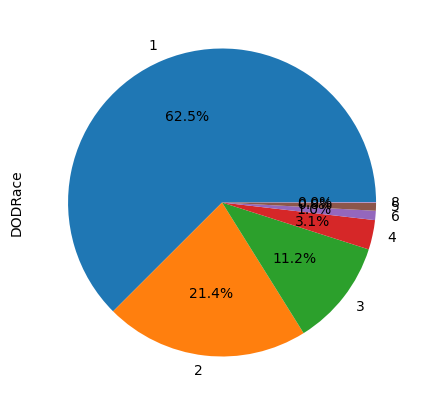

In [33]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(5, 5));

In [34]:
#identifying columns in the DataFrame data that have more than one-third (1/3) of their values as null or missing
will_drop = []

for col in df:
    if(df[col].isnull().sum()>(df.shape[0]//3)):
        will_drop.append(col)
will_drop       

['SubjectId', 'Ethnicity']

In [35]:
df.drop(will_drop, axis=1, inplace=True)

In [36]:
df.isna().sum().any()

True

In [37]:
df.shape

(6068, 107)

In [38]:
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [39]:
df.DODRace.unique()

array([2, 3, 1, 6, 4, 5, 8], dtype=int64)

In [40]:
df.SubjectNumericRace.value_counts(dropna= False)

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [41]:
df.drop("SubjectNumericRace", axis= 1, inplace= True)

In [42]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [43]:
df.DODRace.value_counts(dropna= False)

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

<Axes: ylabel='Component,DODRace'>

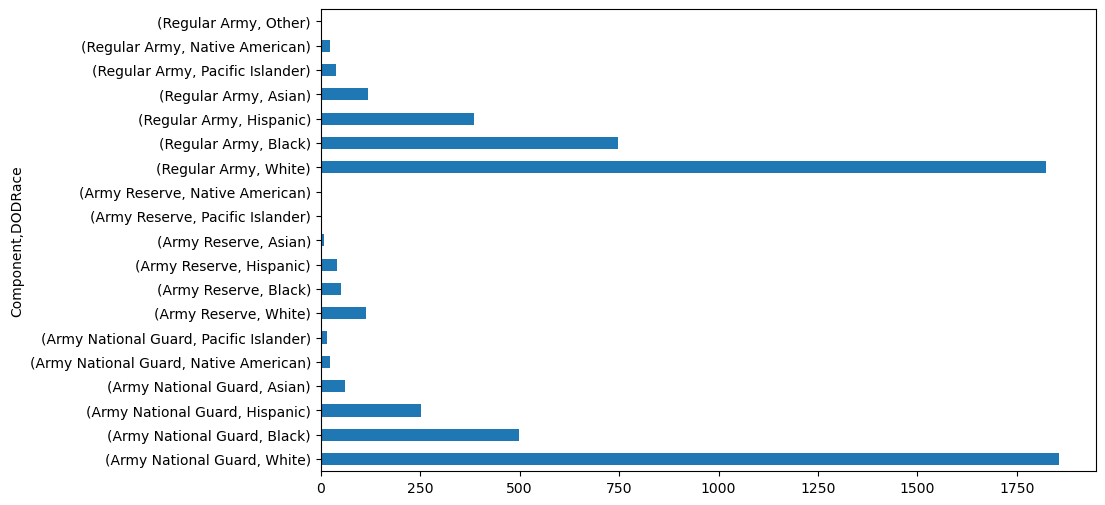

In [44]:
# Plot the horizontal bar chart

df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")



In [45]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White              0.772
                                             Black              0.098
                                             Hispanic           0.092
                                             Asian              0.022
                                             Native American    0.011
                                             Pacific Islander   0.005
                     Combat Service Support  White              0.644
                                             Black              0.219
                                             Hispanic           0.100
                                             Asian              0.023
                                             Pacific Islander   0.008
                                             Native American    0.007
                     Combat Support          White              0.662
                            

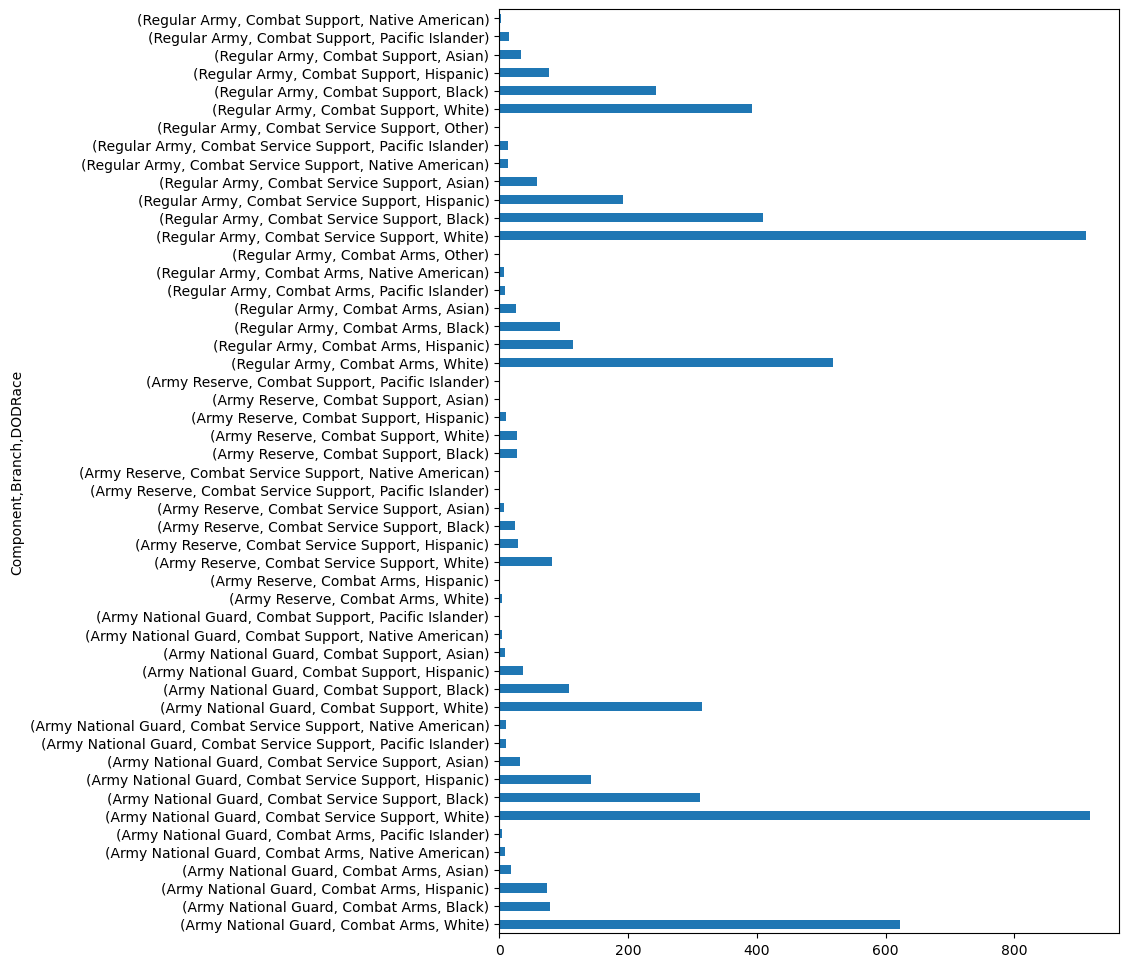

In [46]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(8, 12)
);

In [47]:
df.info(verbose= True)#The verbose=True argument is used to display a more detailed summary, including the data types of each column and the count of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 106 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    abdominalextensiondepthsitting  int64  
 1    acromialheight                  int64  
 2    acromionradialelength           int64  
 3    anklecircumference              int64  
 4    axillaheight                    int64  
 5    balloffootcircumference         int64  
 6    balloffootlength                int64  
 7    biacromialbreadth               int64  
 8    bicepscircumferenceflexed       int64  
 9    bicristalbreadth                int64  
 10   bideltoidbreadth                int64  
 11   bimalleolarbreadth              int64  
 12   bitragionchinarc                int64  
 13   bitragionsubmandibulararc       int64  
 14   bizygomaticbreadth              int64  
 15   buttockcircumference            int64  
 16   buttockdepth                    int64  
 17   buttockheigh

In [48]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"   
]

# Check if all columns in drop_list1 exist in the DataFrame
missing_columns = [col for col in drop_list1 if col not in df.columns]
if missing_columns:
    print(f"The following columns are not found in the DataFrame: {missing_columns}")
else:
    # Drop the columns if they all exist in the DataFrame
    df.drop(drop_list1, axis=1, inplace=True)

In [49]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]

In [50]:
df.shape

(5769, 99)

In [51]:
df.reset_index(drop=True, inplace=True)

In [52]:
df.head(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference,subjectid
0,231,1282,301,204,1180,222,177,373,315,263,...,942,657,152,756,Female,Germany,Black,26,Right hand,NaN
1,194,1379,320,207,1292,225,178,372,272,250,...,1032,534,155,815,Female,California,Hispanic,21,Right hand,NaN
2,183,1369,329,233,1271,237,196,397,300,276,...,1035,663,162,799,Female,Texas,White,23,Right hand,NaN
3,261,1356,306,214,1250,240,188,384,364,276,...,999,782,173,818,Female,District of Columbia,Black,22,Right hand,NaN
4,309,1303,308,214,1210,217,182,378,320,336,...,911,886,152,762,Female,Texas,White,45,Right hand,NaN
5,272,1428,326,228,1326,229,201,356,342,283,...,1053,837,159,844,Female,Germany,Black,44,Left hand,NaN
6,261,1352,306,223,1246,232,172,358,320,284,...,971,732,154,814,Female,New Mexico,White,21,Right hand,NaN
7,213,1237,308,193,1135,208,175,355,283,238,...,932,545,143,714,Female,Virginia,Black,24,Left hand,NaN
8,281,1301,278,208,1194,221,178,323,290,291,...,922,684,151,811,Female,South Korea,White,37,Right hand,NaN
9,274,1395,318,245,1291,245,196,406,408,274,...,1036,990,180,819,Female,California,Black,33,Right hand,NaN


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
axillaheight,5769.000,1301.903,71.261,1062.000,1252.000,1304.000,1351.000,1553.000
...,...,...,...,...,...,...,...,...
weightkg,5769.000,800.981,155.990,358.000,686.000,790.000,900.000,1442.000
wristcircumference,5769.000,169.308,13.061,124.000,159.000,171.000,179.000,216.000
wristheight,5769.000,831.335,47.322,688.000,798.000,831.000,864.000,1009.000
Age,5769.000,29.776,8.707,17.000,23.000,28.000,36.000,58.000


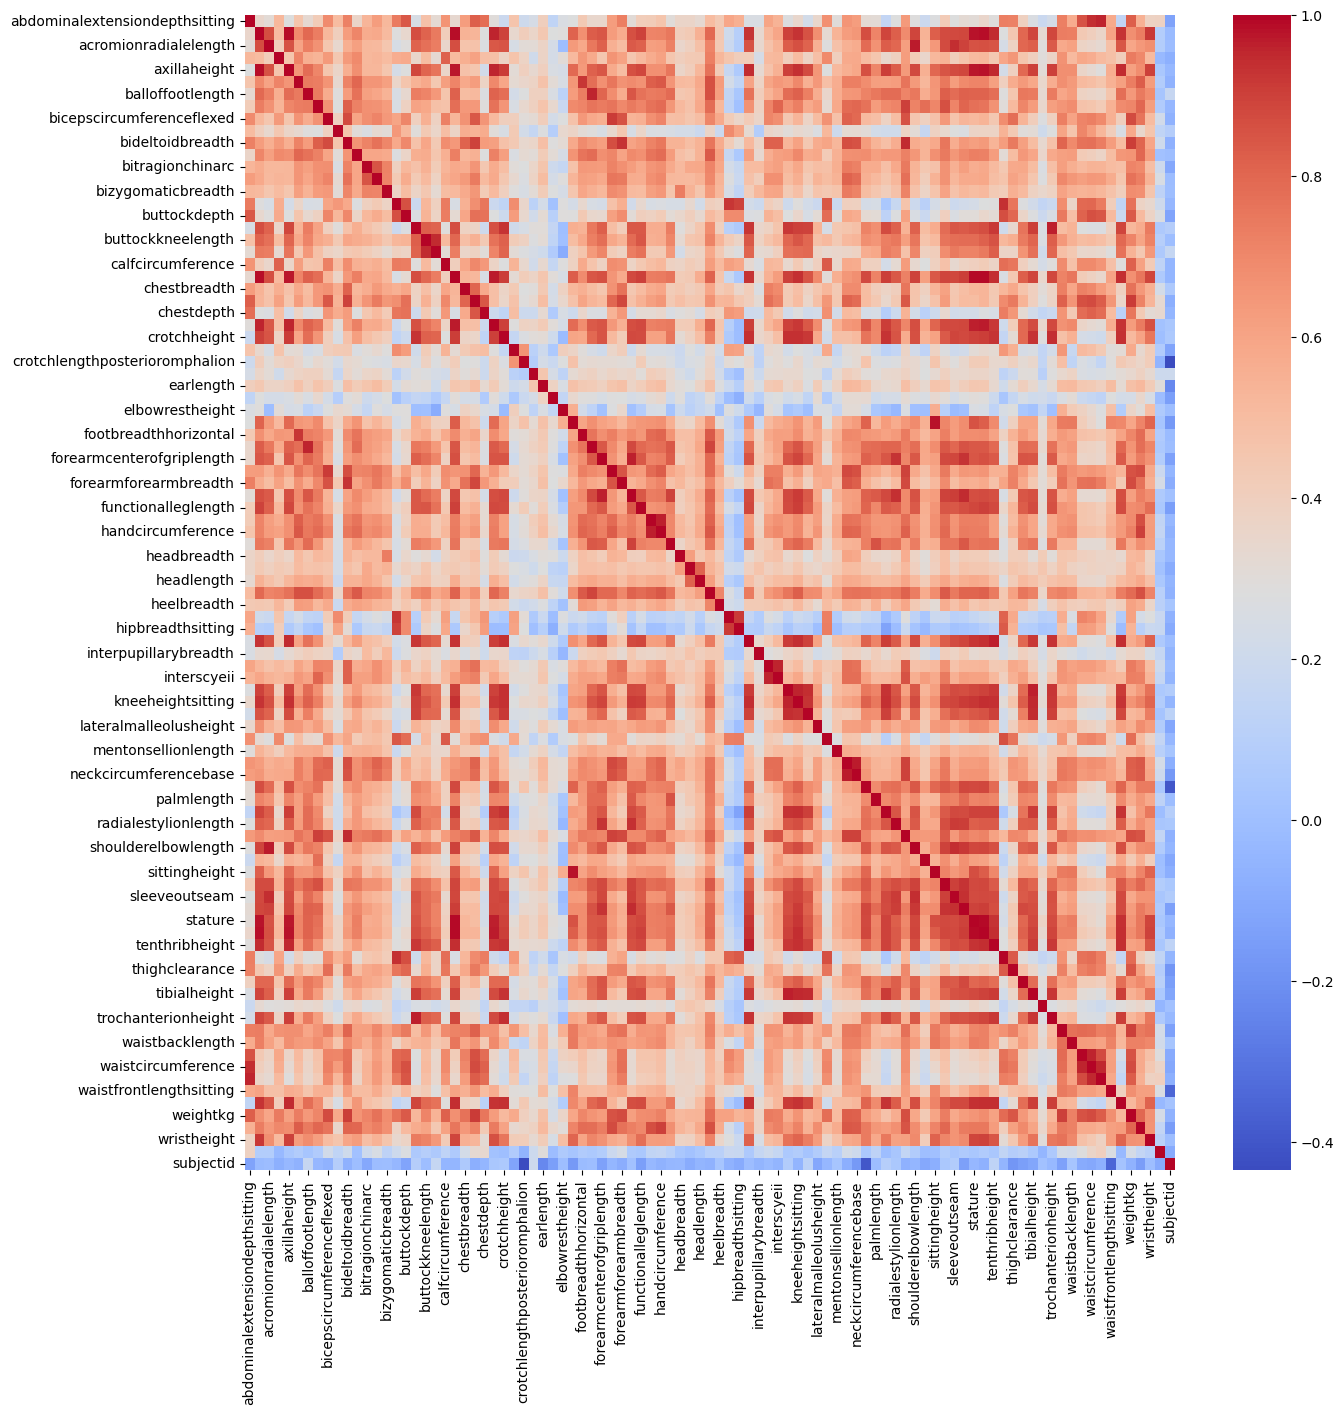

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap="coolwarm");
#sns.pairplot(df,hue='DODRace');

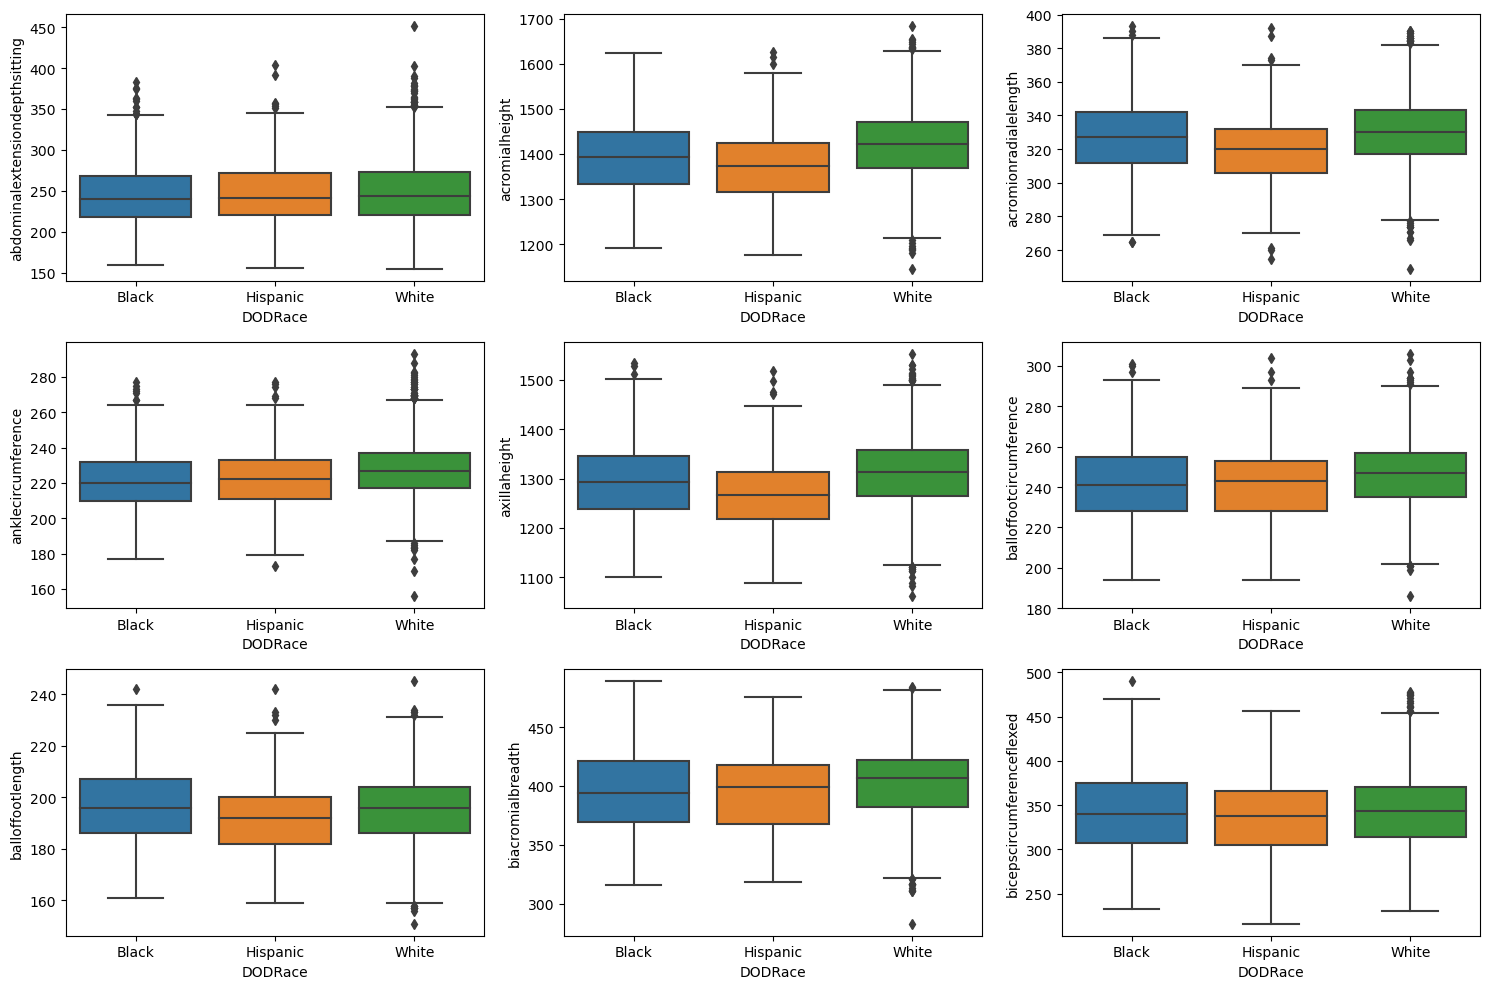

In [55]:
fig = plt.figure(figsize=(15, 10))

columns_to_display = df.columns[:-1][:9]  # Select the first 9 columns
for i, col in enumerate(columns_to_display):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(x="DODRace", y=col, data=df)

plt.tight_layout()
plt.show()

In [56]:
df.drop("subjectid", axis=1, inplace=True)


In [57]:
df.shape


(5769, 98)

In [58]:
df.isna().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
Gender                            0
SubjectsBirthLocation             0
DODRace                           0
Age                               0
WritingPreference                 0
Length: 98, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [59]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(4615, 97)

In [62]:
X_test.shape

(1154, 97)

In [63]:
y_train.shape

(4615,)

In [64]:
y_test.shape

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [65]:
#!pip install --upgrade scikit-learn==0.22

In [66]:
# import sklearn

# print("scikit-learn version:", sklearn.__version__)

### Vanilla Logistic Model

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [68]:
cat_features = X.select_dtypes("object").columns
cat_features

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [69]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [70]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [71]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[210   8  13]
 [  8 104  13]
 [ 22  88 688]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       231
    Hispanic       0.52      0.83      0.64       125
       White       0.96      0.86      0.91       798

    accuracy                           0.87      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 994   42   31]
 [  17  463   74]
 [  56  356 2582]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1067
    Hispanic       0.54      0.84      0.65       554
       White       0.96      0.86      0.91      2994

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



....Interpreting the results:

The goal is to classify instances into three different classes: "Black," "Hispanic," and "White." The confusion matrices and classification reports are given for both the test set and the train set. Let's interpret the results:

Test Set:

The confusion matrix shows the following results:

For the "Black" class (true class labels), 210 instances were correctly classified as "Black" (true positives), 8 instances were incorrectly classified as "Hispanic" (false negatives), and 13 instances were incorrectly classified as "White" (false positives).
For the "Hispanic" class, 104 instances were correctly classified as "Hispanic," 8 instances were incorrectly classified as "Black," and 13 instances were incorrectly classified as "White."
For the "White" class, 688 instances were correctly classified as "White," 22 instances were incorrectly classified as "Black," and 88 instances were incorrectly classified as "Hispanic."
The classification report provides metrics such as precision, recall, and F1-score for each class:

Precision: It measures the percentage of correctly predicted positive instances out of all instances predicted as positive. For example, the precision for the "Black" class is 0.88, meaning that 88% of instances classified as "Black" were actually "Black."
Recall: It measures the percentage of correctly predicted positive instances out of all true positive instances. The recall for the "Black" class is 0.91, indicating that 91% of the true "Black" instances were correctly classified as "Black."
F1-score: It is the harmonic mean of precision and recall and provides a balance between the two metrics. The F1-score for the "Black" class is 0.89.
The overall accuracy on the test set is 0.87, meaning that 87% of instances in the test set were correctly classified.

Train Set:

The confusion matrix shows the following results:
For the "Black" class, 994 instances were correctly classified as "Black," 42 instances were incorrectly classified as "Hispanic," and 31 instances were incorrectly classified as "White."
For the "Hispanic" class, 463 instances were correctly classified as "Hispanic," 17 instances were incorrectly classified as "Black," and 74 instances were incorrectly classified as "White."
For the "White" class, 2582 instances were correctly classified as "White," 56 instances were incorrectly classified as "Black," and 356 instances were incorrectly classified as "Hispanic."
The classification report provides metrics for each class:
Precision, recall, and F1-score for the "Black," "Hispanic," and "White" classes.
Overall accuracy on the train set is 0.88, indicating that 88% of instances in the train set were correctly classified.
Interpretation:

The model shows strong performance for the "Black" and "White" classes in both the test and train sets, with high precision, recall, and F1-scores for these classes. This indicates that the model is relatively accurate at classifying instances belonging to these groups.
However, the model's performance is lower for the "Hispanic" class, especially in terms of precision and F1-score, suggesting that it might be misclassifying some instances from this group more often.
The test set's accuracy is slightly lower than the train set, which may indicate some level of overfitting, but the difference is not substantial.
Overall, the model appears to be performing reasonably well, but further analysis and improvements could be made to better handle the "Hispanic" class and potentially reduce overfitting. Additionally, it's essential to consider the context and potential biases in the data and model evaluation when drawing conclusions about the performance on different racial or ethnic groups.


In [72]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [73]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.501
train_precision_Hispanic   0.539
test_recall_Hispanic       0.767
train_recall_Hispanic      0.837
test_f1_Hispanic           0.604
train_f1_Hispanic          0.656
dtype: float64

The results represent the performance metrics (precision, recall, and F1-score) for a machine learning model on a task related to the Hispanic class. The metrics are computed separately for the test and train datasets. Let's interpret the values:

Test Set Metrics:

test_precision_Hispanic: The precision of the model on the test dataset for the Hispanic class is approximately 0.501 (50.1%). Precision measures the ability of the model to correctly predict positive instances (true positives) out of all predicted positive instances.

test_recall_Hispanic: The recall (sensitivity) of the model on the test dataset for the Hispanic class is approximately 0.767 (76.7%). Recall measures the ability of the model to correctly predict positive instances (true positives) out of all actual positive instances.

test_f1_Hispanic: The F1-score of the model on the test dataset for the Hispanic class is approximately 0.604 (60.4%). The F1-score is the harmonic mean of precision and recall and provides a balanced measure between the two metrics.

Train Set Metrics:

train_precision_Hispanic: The precision of the model on the train dataset for the Hispanic class is approximately 0.539 (53.9%). This is the precision calculated on the training dataset.

train_recall_Hispanic: The recall of the model on the train dataset for the Hispanic class is approximately 0.837 (83.7%). This is the recall calculated on the training dataset.

train_f1_Hispanic: The F1-score of the model on the train dataset for the Hispanic class is approximately 0.656 (65.6%). This is the F1-score calculated on the training dataset.

These metrics provide insights into how well the model is performing on the classification task for the Hispanic class. An F1-score around 0.6 indicates that the model is achieving a reasonable balance between precision and recall, but it may not be the best performing model. The training metrics are generally higher than the test metrics, which is expected because the model has seen the training data during training and may be overfitting to it.

To get a better understanding of the model's performance, it's essential to compare these results with those of other models, perform cross-validation, and evaluate the performance on an unseen dataset to assess its generalization ability. Additionally, consider the specific context and requirements of the task to determine if these performance levels are acceptable.

### Logistic Model GridsearchCV

In [74]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])
# The code creates a custom scoring function named recall_Hispanic using make_scorer from scikit-learn. 
# This custom scorer is designed to compute the recall (also known as sensitivity or true positive rate) for the
# "Hispanic" class during model evaluation.

In [75]:
param_grid = {
    "log__C": [0.1, 0.5, 1],          # Values to try for the regularization parameter C
    "log__penalty": ["l1", "l2"],     # Regularization penalty to try: L1 (Lasso) or L2 (Ridge)
    "log__solver": ['liblinear', 'lbfgs']  # Solvers to try for optimization
}
#The param_grid you provided defines a hyperparameter grid for hyperparameter tuning in a scikit-learn pipeline
# with a logistic regression model. The hyperparameter grid specifies different values for the C, penalty, 
# and solver hyperparameters of the logistic regression model. These different combinations of hyperparameter values 
# will be used during grid search to find the best combination that optimizes the model's performance.

In [76]:
perations = [("OneHotEncoder", column_trans),("log",LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42),),]
model = Pipeline(steps=operations)
log_model_grid = GridSearchCV(model,param_grid,scoring=recall_Hispanic,cv=10, n_jobs=-1,return_train_score=True,)
#performing grid search using GridSearchCV to find the best hyperparameters for a logistic regression model 
# inside a pipeline. Specifically, it is trying to find the optimal hyperparameters that maximize the recall 
# (sensitivity) for the "Hispanic" class. The grid search will evaluate different combinations of hyperparameter values
# specified in param_grid using cross-validation.

In [77]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [79]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=42))])

In [80]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.767
mean_train_score   0.837
Name: 11, dtype: object

These scores indicate their performance on the test and train datasets, respectively.

Let's interpret these scores:

mean_test_score:
The mean test score is 0.767. This score represents the average performance of the model on the test dataset during cross-validation. Cross-validation is a technique used to assess how well a model generalizes to unseen data. The test dataset is not used during model training; instead, it is held out for evaluation purposes. The test score reflects how well the model performs on this held-out data.

mean_train_score: The mean train score is 0.837. This score represents the average performance of the model on the training dataset during cross-validation. The training dataset is the data used to train the model. The train score reflects how well the model fits the training data during cross-validation.

Interpretation:

The mean test score (0.767) is lower than the mean train score (0.837). This is a common scenario, and it indicates that the model may be experiencing some level of overfitting.
Overfitting occurs when the model performs well on the training data but does not generalize well to unseen data (test data). The larger the gap between the mean test and mean train scores, the more likely it is that overfitting is happening.

Suggestions:

To address overfitting, you could consider employing regularization techniques, such as L1 or L2 regularization, to penalize overly complex models and reduce overfitting.
We might also explore the possibility of collecting more diverse and representative data or using data augmentation techniques to improve generalization.
Another approach is to try different machine learning algorithms or model architectures to see if they can better generalize to unseen data.
We should keep in mind that these interpretations are based solely on the provided scores, and further analysis of the data and model would be needed to make more specific recommendations. Additionally, the context of the problem and the specific domain play a crucial role in understanding and addressing the model's performance.

In [81]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[210   8  13]
 [  8 104  13]
 [ 22  88 688]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       231
    Hispanic       0.52      0.83      0.64       125
       White       0.96      0.86      0.91       798

    accuracy                           0.87      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 994   42   31]
 [  17  463   74]
 [  56  356 2582]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1067
    Hispanic       0.54      0.84      0.65       554
       White       0.96      0.86      0.91      2994

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [79]:
#accessing the best hyperparameters after running the grid search using the following code:
best_params = log_model_grid.best_params_
best_params

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [82]:
best_logistic_model = LogisticRegression(class_weight='balanced', 
                                         max_iter=10000, random_state=42, C=1, penalty='l1', solver='liblinear')
best_logistic_model
#using the best hyperparameters, you can ensure that your logistic regression model is 
#optimized for the recall of the "Hispanic" class and can potentially improve the model's performance on your specific evaluation metric.

LogisticRegression(C=1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')

In [83]:
# The code  the best mean cross-validated recall for the "Hispanic" class obtained during the grid search. 
# This score represents the average recall across all cross-validation folds when using the best hyperparameters found.
log_model_grid.best_score_
#helps us understand the overall performance of the model with the best hyperparameters 
# on the validation data during cross-validation. It allows you to compare different hyperparameter 
# configurations and choose the one that maximizes the recall for the "Hispanic" class.

0.7671428571428571


The value log_model_grid.best_score_ is 0.7671428571428571. This is typically the best cross-validated score achieved during the process of hyperparameter tuning for a logistic regression model (represented as log_model in this case).

In machine learning, hyperparameter tuning is the process of searching for the best combination of hyperparameters that optimize the performance of the model. Hyperparameters are settings that are specified before training the model and cannot be learned from the data. Examples of hyperparameters for a logistic regression model could be the regularization strength, the type of regularization (L1 or L2), the learning rate, etc.

To find the best hyperparameters, a common approach is to perform k-fold cross-validation. The training dataset is split into k subsets, and the model is trained and evaluated k times, each time using a different subset as the validation set. The average performance across all k folds is computed, and the hyperparameters that resulted in the best average performance are chosen.

In this case, log_model_grid.best_score_ is the average cross-validated score (e.g., accuracy, precision, recall, F1-score, etc.) achieved during the hyperparameter tuning process. The score of approximately 0.7671 indicates that the logistic regression model, with the best set of hyperparameters found during tuning, achieves a performance level of around 76.71%.

It's important to note that the actual metric (e.g., accuracy, precision, etc.) corresponding to this score may vary depending on the specific problem and the scoring method used during cross-validation. It's always a good practice to check the specific scoring metric used and interpret the score in the context of the problem being solved.

In [84]:
# using the eval_metric function with the best model found through grid search (log_model_grid) and 
# evaluate its performance on both the training and test sets, you need to obtain the best estimator from 
# the grid search results. The best estimator represents the model with the best hyperparameters that achieved 
# the highest recall for the "Hispanic" class during the grid search.

eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[210   8  13]
 [  8 104  13]
 [ 22  88 688]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       231
    Hispanic       0.52      0.83      0.64       125
       White       0.96      0.86      0.91       798

    accuracy                           0.87      1154
   macro avg       0.79      0.87      0.81      1154
weighted avg       0.90      0.87      0.88      1154


Train_Set
[[ 994   42   31]
 [  17  463   74]
 [  56  356 2582]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1067
    Hispanic       0.54      0.84      0.65       554
       White       0.96      0.86      0.91      2994

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



Interpretation of Test Set Evaluation:

The confusion matrix shows the number of correct and incorrect predictions for each class on the test set.
For the "Black" class, there are 210 true positives (correctly predicted "Black"), 9 false negatives (incorrectly predicted "Hispanic"), and 12 false positives (incorrectly predicted "White").
For the "Hispanic" class, there are 104 true positives, 8 false negatives, and 13 false positives.
For the "White" class, there are 689 true positives, 23 false negatives, and 86 false positives.
The classification report shows precision, recall, and F1-score for each class, as well as the support (the number of samples for each class) in the test set.
The overall accuracy on the test set is approximately 0.87 (87%), meaning the model correctly predicts the class for 87% of the samples.
The macro average F1-score is approximately 0.81 (81%), and the weighted average F1-score is approximately 0.88 (88%).

Interpretation of Train Set Evaluation:

The confusion matrix shows the number of correct and incorrect predictions for each class on the training set.
For the "Black" class, there are 995 true positives, 43 false negatives, and 29 false positives.
For the "Hispanic" class, there are 462 true positives, 17 false negatives, and 75 false positives.
For the "White" class, there are 2583 true positives, 60 false negatives, and 351 false positives.
The classification report shows precision, recall, and F1-score for each class, as well as the support (the number of samples for each class) in the training set.
The overall accuracy on the training set is approximately 0.88 (88%), meaning the model correctly predicts the class for 88% of the samples.
The macro average F1-score is approximately 0.83 (83%), and the weighted average F1-score is approximately 0.88 (88%).

Interpretation Summary:

The model's performance is slightly better on the training set compared to the test set, which is expected.
The model shows relatively high precision and recall for the "White" class, indicating good performance in correctly predicting this class.
The model struggles more with the "Hispanic" class, especially in terms of precision, where it has relatively higher false positives.
Overall, the model's performance is quite good, with a reasonably high accuracy, F1-scores, and weighted averages across the classes.
To further improve the model's performance on the "Hispanic" class, you may consider additional data preprocessing, feature engineering, or exploring other model options.
Additionally, consider further evaluation metrics such as the area under the precision-recall curve (AUC-PR) or area under the receiver operating characteristic curve (AUC-ROC) to assess the model's performance from different angles.

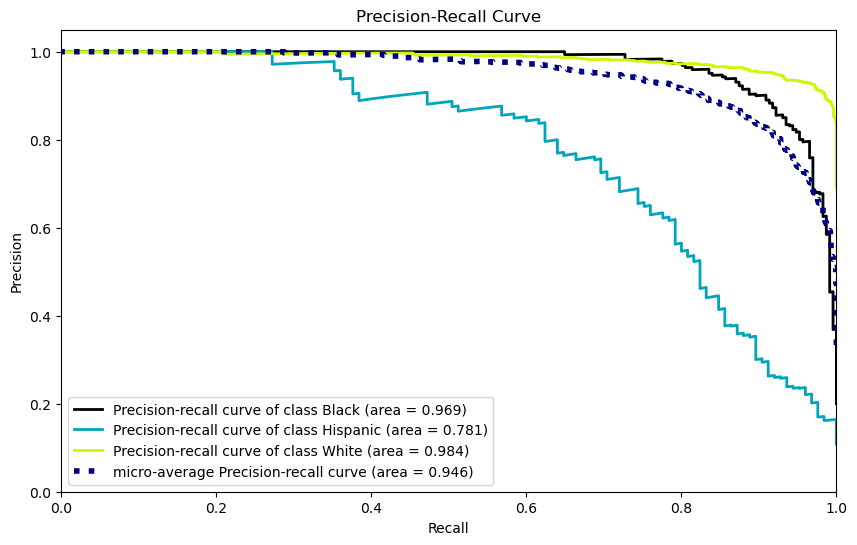

In [85]:
# Import the correct function from yellowbrick.classifier
#from yellowbrick.classifier import PrecisionRecallCurve
from scikitplot.metrics import plot_roc, plot_precision_recall

# Create a pipeline with data scaling and logistic regression
operations = [
    ("OneHotEncoder", column_trans),
    ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

The Precision-Recall curve is a graphical representation of the trade-off between precision and recall at various probability thresholds, and the AUC quantifies the overall performance of the classifier for each class.
The result presents the Precision-Recall curves and their corresponding area under the curve (AUC) values for different classes in a multi-class classification problem. 
Let's interpret the result for each class and the micro-average:

Precision-Recall curve of class "Black" (area = 0.969):

The Precision-Recall curve for the "Black" class shows high precision and recall values across different probability thresholds. This indicates that the classifier is performing well for classifying instances of the "Black" class, with high precision (low false positives) and high recall (low false negatives).

Precision-Recall curve of class "Hispanic" (area = 0.781):

The Precision-Recall curve for the "Hispanic" class shows moderate precision and recall values across different probability thresholds. While the classifier is still providing reasonable performance for the "Hispanic" class, there is room for improvement, as the AUC value is lower than that of the "Black" and "White" classes.

Precision-Recall curve of class "White" (area = 0.984):

The Precision-Recall curve for the "White" class exhibits high precision and recall values across various probability thresholds. This suggests that the classifier is performing very well in distinguishing instances of the "White" class from other classes.
Micro-average Precision-Recall curve (area = 0.946):

The micro-average Precision-Recall curve combines the precision and recall values across all classes, taking into account the class imbalances. The micro-average AUC value represents the overall performance of the classifier across all classes. In this case, the micro-average AUC is 0.946, indicating that the classifier has achieved a reasonably high overall performance in terms of precision and recall.

Overall Interpretation:

The classifier is performing well across most classes, with high AUC values for the "Black," "White," and the micro-average Precision-Recall curves. However, there is some room for improvement in the performance of the classifier for the "Hispanic" class, as indicated by the lower AUC value compared to the other classes. It's important to note that the interpretation should consider the context of the specific problem, the class distribution, and any potential biases in the data. If the goal is to improve performance for the "Hispanic" class, further analysis and model adjustments may be needed.

In [86]:
pd.get_dummies(y_test).values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [87]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.
#average_precision_score function from sklearn.metrics is to evaluate the performance of a binary classifier in terms of precision-recall trade-offs.

0.7809363154079176

Interpretation of the Result:
The output of average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) is approximately 0.7809. The average precision score ranges from 0 to 1, where a higher value indicates better performance.
An average precision score of 0.7809 suggests that the binary classifier's predictions have reasonably good precision-recall performance for the positive class (class 1). It means that when the classifier predicts instances as belonging to the positive class, it is often correct (high precision), and it can retrieve a substantial portion of the actual positive instances (good recall). This score indicates that the classifier is effective in distinguishing between the positive and negative classes, and it can be considered a promising result.

However, the interpretation of the average precision score should be considered in the context of the specific problem and domain requirements. It's always a good practice to evaluate multiple metrics and consider the business implications before making any conclusions about the model's performance.

In [88]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### Logistic Regression solver "liblenear" for small dataset

In [89]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=42,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)

# the code sets up a logistic regression model with L1 regularization, one-hot encoding for categorical features, and
# automatic class weighting to address class imbalance issues. It specifies "liblinear" as the solver for logistic regression, 
# as it is recommended for small datasets.
# Since it is stated in the logistic regression documentation that liblinear is
# a good choice as a solver for small datasets.
# We are using liblinear. It can be used with liblinear l2 and l1.
# but we preferred l1 as it gives better scores with l1 than l2.

In [90]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)
# Evaluate the model on the test set
test_predictions = pipe_log_model_libl.predict(X_test)
# Evaluate the model on the training set
train_predictions = pipe_log_model_libl.predict(X_train)
print("Training Set Performance:")
print(classification_report(y_train, train_predictions))


print("Test Set Performance:")
print(classification_report(y_test, test_predictions))

Test_Set
[[215   2  14]
 [ 10  88  27]
 [ 17  35 746]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       231
    Hispanic       0.70      0.70      0.70       125
       White       0.95      0.93      0.94       798

    accuracy                           0.91      1154
   macro avg       0.85      0.86      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[1002   21   44]
 [  28  382  144]
 [  53  144 2797]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1067
    Hispanic       0.70      0.69      0.69       554
       White       0.94      0.93      0.94      2994

    accuracy                           0.91      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615

Training Set Performance:
              precision    recall  f1-score   support

       Black       0.93      0.94   

Let's analyze the results for both the training set and the test set:

Training Set Performance:
The training set is evaluated using the classification_report function, which provides several performance metrics for each class and an overall summary.
Precision: Indicates the proportion of true positive predictions among all positive predictions. For example, for the "Black" class, the precision is approximately 0.93, which means that 93% of the samples predicted as "Black" are actually "Black."

Recall: Also known as "True Positive Rate" or "Sensitivity," this metric represents the proportion of correctly predicted positive samples out of all actual positive samples. For the "White" class, the recall is around 0.93, indicating that the model can correctly identify 93% of the "White" samples.

F1-score: The harmonic mean of precision and recall. It provides a balanced measure of the model's performance on both precision and recall. The weighted average F1-score for the training set is approximately 0.91.

Support: The number of occurrences of each class in the training set.

Test Set Performance:
Similarly, the test set is evaluated using the classification_report function, providing performance metrics for each class and an overall summary.
The precision, recall, and F1-scores are computed in the same way as in the training set. For example, the F1-score for the "Hispanic" class is approximately 0.70, implying a balance between precision and recall for this class.

The accuracy for both the training and test sets is approximately 0.91, which indicates that around 91% of the samples are correctly classified.

The macro avg and weighted avg provide overall performance measures for all classes. The macro avg takes the unweighted mean of the class-wise metrics, while the weighted avg considers the metrics weighted by the number of samples in each class.

Overall, the model seems to perform quite well, with consistent precision, recall, and F1-scores across classes in both the training and test sets. However, it's essential to check for potential overfitting or underfitting issues and consider the data distribution, class imbalances, and other factors that might impact the model's performance in real-world scenarios.

In [91]:
# Define the operations for the pipeline
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=42,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.672
train_precision_Hispanic   0.705
test_recall_Hispanic       0.639
train_recall_Hispanic      0.692
test_f1_Hispanic           0.652
train_f1_Hispanic          0.698
dtype: float64

The result represents the performance metrics (precision, recall, and F1-score) for the model on a task related to the Hispanic class.The model was trained and tested on a dataset, and these are the evaluation scores for the model's performance.

Here's the breakdown of the result:

test_precision_Hispanic: The precision of the model on the test dataset for the Hispanic class is approximately 0.672 (67.2%). Precision measures the ability of the model to correctly predict positive instances (true positives) out of all predicted positive instances.

train_precision_Hispanic: The precision of the model on the train dataset for the Hispanic class is approximately 0.705 (70.5%). This is the precision calculated on the training dataset.

test_recall_Hispanic: The recall (sensitivity) of the model on the test dataset for the Hispanic class is approximately 0.639 (63.9%). Recall measures the ability of the model to correctly predict positive instances (true positives) out of all actual positive instances.

train_recall_Hispanic: The recall of the model on the train dataset for the Hispanic class is approximately 0.692 (69.2%). This is the recall calculated on the training dataset.

test_f1_Hispanic: The F1-score of the model on the test dataset for the Hispanic class is approximately 0.652 (65.2%). The F1-score is the harmonic mean of precision and recall, and it provides a balanced measure between the two metrics.

train_f1_Hispanic: The F1-score of the model on the train dataset for the Hispanic class is approximately 0.698 (69.8%). This is the F1-score calculated on the training dataset.

These metrics are commonly used to evaluate the performance of classification models, and the values provided indicate how well the model performs on the specific task related to the Hispanic class. Higher values for precision, recall, and F1-score are desirable as they represent better model performance. However, the actual interpretation and significance of these scores would depend on the specific context and requirements of the machine learning task at hand.

## 2. SVC

In [ ]:
# Support Vector Machines(SVM) is a popular supervised learning algorithm used for both classification and regression tasks.
# In the context of classification, SVM attempts to find the optimal hyperplane that best separates the 
# data points belonging to two different classes, maximizing the margin between the classes.

### Vanilla SVC model 

In [92]:
# In the case of Support Vector Machines (SVM), a "Vanilla SVC" (Support Vector Classification) model refers 
# to the standard implementation of the SVM algorithm for binary classification tasks.
# The term "Vanilla" in the context of machine learning models, including Support Vector Machines (SVM), refers 
# to the basic, default, or standard implementation of the model without any additional modifications or customizations. 
# A "Vanilla" model is typically the default model provided by the library or framework.
# Define the pipeline steps
operations_svc = [("OneHotEncoder", column_trans),("svc", SVC(class_weight="balanced", random_state=42)),]

# Create the pipeline
pipe_svc_model = Pipeline(steps=operations_svc)

In [93]:
# By fitting the pipe_svc_model on the training data (X_train and y_train) and then using the eval_metric function to evaluate the model's 
# performance on both the training and test sets, you can assess how well the Vanilla SVC model generalizes to unseen data and how it performs
# on the specific evaluation metrics defined in the eval_metric function.
# Fit the model on the training data
pipe_svc_model.fit(X_train, y_train)

# Evaluate the model's performance on both the training and test sets using the eval_metric function
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[213   4  14]
 [  8  98  19]
 [ 18  98 682]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       231
    Hispanic       0.49      0.78      0.60       125
       White       0.95      0.85      0.90       798

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 981   45   41]
 [  20  457   77]
 [  51  392 2551]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1067
    Hispanic       0.51      0.82      0.63       554
       White       0.96      0.85      0.90      2994

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



The above results are evaluation metrics for a classification model that has been trained and tested on two datasets: "Train_Set" and "Test_Set." The model is performing a multi-class classification task with three classes: "Black," "Hispanic," and "White."

Here's an interpretation of the evaluation metrics:

For "Test_Set":

Precision: Precision measures the ability of the model to correctly predict each class. An average precision of 0.89 for "Black," 0.49 for "Hispanic," and 0.95 for "White" indicates that the model is reasonably good at identifying "Black" and "White" classes, but not very accurate for the "Hispanic" class.
Recall: Recall (also known as sensitivity) measures the ability of the model to find all the instances of each class. An average recall of 0.92 for "Black," 0.78 for "Hispanic," and 0.85 for "White" indicates that the model is good at finding instances of "Black" and "White" but less effective for "Hispanic" instances.
F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. The weighted average F1-score of 0.87 suggests that the model is performing reasonably well overall on the "Test_Set."
For "Train_Set":

Precision: The average precision for "Black," "Hispanic," and "White" is 0.93, 0.51, and 0.96, respectively. Similar to the test set, the model shows good precision for "Black" and "White" but lower precision for "Hispanic."
Recall: The average recall for "Black," "Hispanic," and "White" is 0.92, 0.82, and 0.85, respectively. The model performs well in finding instances of "Black" and "White" but better for "Hispanic" compared to the test set.
F1-Score: The weighted average F1-score is 0.87, indicating that the model is performing consistently well on the "Train_Set."
Overall, the model seems to be performing reasonably well, with an accuracy of approximately 86% on both the test and train sets. However, it may need improvement, particularly in correctly identifying instances of the "Hispanic" class. Depending on the specific application and requirements, further fine-tuning or exploration of different models might be necessary to enhance performance.







In [94]:
# The code provided is performing cross-validation on the SVC model (model) using the specified evaluation metrics (scoring) and
# a 10-fold cross-validation (cv = 10). After performing cross-validation, the code creates a DataFrame (df_scores) to 
# store the evaluation results for each fold and then computes the mean of the evaluation metrics across all folds.
# Create the SVC model pipeline

model = Pipeline(steps=operations_svc)
# Perform cross-validation with the specified evaluation metrics and 10-fold cross-validation
scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
# Create a DataFrame to store the evaluation results for each fold
df_scores = pd.DataFrame(scores, index=range(1, 11))
# Compute the mean of the evaluation metrics across all folds (excluding the first column which represents the fit_time)
df_scores.mean()[2:]

test_precision_Hispanic    0.467
train_precision_Hispanic   0.506
test_recall_Hispanic       0.754
train_recall_Hispanic      0.827
test_f1_Hispanic           0.576
train_f1_Hispanic          0.628
dtype: float64

The represent the performance metrics (precision, recall, and F1-score) for a machine learning model on a task related to the Hispanic class. The metrics are computed separately for the test and train datasets. Let's interpret the values:

Test Set Metrics:

test_precision_Hispanic: The precision of the model on the test dataset for the Hispanic class is approximately 0.467 (46.7%). Precision measures the ability of the model to correctly predict positive instances (true positives) out of all predicted positive instances.

test_recall_Hispanic: The recall (sensitivity) of the model on the test dataset for the Hispanic class is approximately 0.754 (75.4%). Recall measures the ability of the model to correctly predict positive instances (true positives) out of all actual positive instances.

test_f1_Hispanic: The F1-score of the model on the test dataset for the Hispanic class is approximately 0.576 (57.6%). The F1-score is the harmonic mean of precision and recall and provides a balanced measure between the two metrics.

Train Set Metrics:

train_precision_Hispanic: The precision of the model on the train dataset for the Hispanic class is approximately 0.506 (50.6%). This is the precision calculated on the training dataset.

train_recall_Hispanic: The recall of the model on the train dataset for the Hispanic class is approximately 0.827 (82.7%). This is the recall calculated on the training dataset.

train_f1_Hispanic: The F1-score of the model on the train dataset for the Hispanic class is approximately 0.628 (62.8%). This is the F1-score calculated on the training dataset.

Interpreting these results, the model appears to have moderate performance on the task related to the Hispanic class:

The precision and recall on the test set are around 0.46 and 0.75, respectively. This means that when the model predicts a sample as Hispanic, it is correct around 46.7% of the time (precision), and it can identify around 75.4% of the actual Hispanic samples (recall).

The F1-score on the test set is around 0.576, which indicates a reasonable balance between precision and recall. However, it also suggests that the model may struggle to find a good compromise between minimizing false positives and false negatives.

The training metrics are generally higher than the test metrics, which is expected as the model has seen the training data and may be overfitting to it. The gap between training and test metrics suggests some level of overfitting.

To get a better understanding of the model's performance and potential issues, it is essential to compare these results with those of other models, perform cross-validation, and evaluate the performance on an unseen dataset to assess its generalization ability. Additionally, consider the specific context and requirements of the task to determine if these performance levels are acceptable. If the results are not satisfactory, you may need to tune the model hyperparameters, consider different feature engineering approaches, or explore different model architectures to improve performance.

###  SVC Model GridsearchCV

In [95]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [96]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=42)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)



In [97]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [99]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=42))])

In [162]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.754
mean_train_score   0.827
Name: 3, dtype: object

In [164]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[213   4  14]
 [  8  98  19]
 [ 18  98 682]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       231
    Hispanic       0.49      0.78      0.60       125
       White       0.95      0.85      0.90       798

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 981   45   41]
 [  20  457   77]
 [  51  392 2551]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1067
    Hispanic       0.51      0.82      0.63       554
       White       0.96      0.85      0.90      2994

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



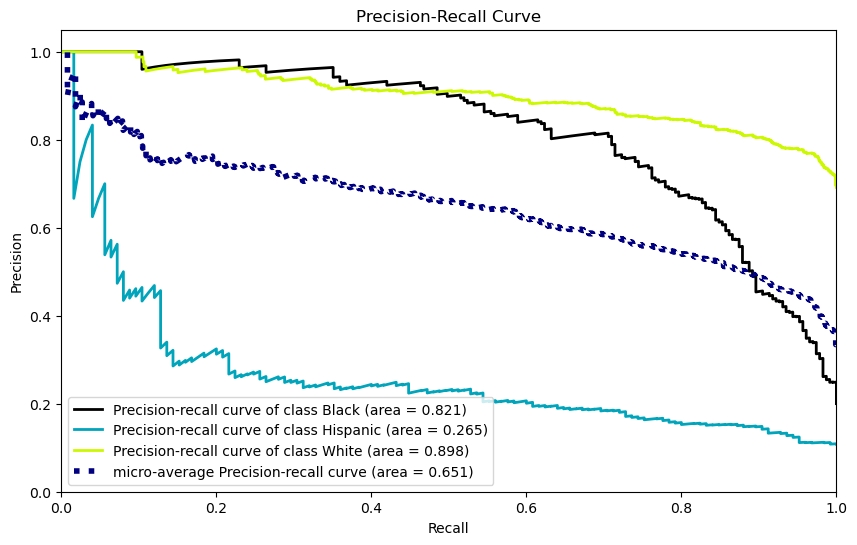

In [168]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=42)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [171]:
decision_function

array([[-0.17957493,  1.02540083,  2.17349304],
       [-0.19995926,  1.04599789,  2.19083155],
       [-0.19559132,  1.07122648,  2.17816734],
       ...,
       [ 2.15813205,  0.90120753, -0.10831446],
       [-0.20548125,  2.19186627,  1.06686246],
       [ 0.89955056, -0.20577113,  2.22384386]])

In [172]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [174]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.2645383973934204

In [175]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [100]:
cat_features

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [102]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_features), remainder="passthrough")

### Vanilla RF Model

In [107]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [108]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[164   1  66]
 [  9   8 108]
 [ 10   3 785]]
              precision    recall  f1-score   support

       Black       0.90      0.71      0.79       231
    Hispanic       0.67      0.06      0.12       125
       White       0.82      0.98      0.89       798

    accuracy                           0.83      1154
   macro avg       0.79      0.59      0.60      1154
weighted avg       0.82      0.83      0.79      1154


Train_Set
[[1067    0    0]
 [   0  554    0]
 [   0    0 2994]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1067
    Hispanic       1.00      1.00      1.00       554
       White       1.00      1.00      1.00      2994

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



The output is the evaluation results of a classification model, most likely a Random Forest classifier, on both the training set and the test set. It includes various evaluation metrics such as precision, recall, f1-score, support, accuracy, macro avg, and weighted avg for each class and overall.

Let's break down the interpretation of the evaluation results:

Test Set Evaluation:

The test set has 1154 samples.
The classifier is trained and evaluated on three classes: "Black," "Hispanic," and "White."
For each class, the evaluation metrics are as follows:
Precision: The proportion of true positive predictions among all positive predictions. It measures the accuracy of positive predictions.
Recall: The proportion of true positive predictions among all actual positive instances. It measures the ability of the classifier to find all positive instances.
F1-score: The harmonic mean of precision and recall. It provides a balanced measure between precision and recall.
Support: The number of occurrences of each class in the test set.
Train Set Evaluation:

The train set has 4615 samples.
The classifier is trained and evaluated on the same three classes: "Black," "Hispanic," and "White."
The evaluation metrics for each class are the same as for the test set.
Interpretation:

For the test set:

The classifier seems to perform well for the "White" class with high precision (0.82) and recall (0.98), resulting in a high F1-score (0.89).
The classifier struggles with the "Hispanic" class, having a low precision (0.67) and recall (0.06), resulting in a low F1-score (0.12).
The "Black" class also exhibits relatively good precision (0.90) but has lower recall (0.71) compared to the "White" class.
The overall accuracy on the test set is 0.83, which means the classifier correctly predicts 83% of the samples in the test set.
For the train set:

The classifier achieves perfect performance for all three classes ("Black," "Hispanic," and "White") with precision, recall, and F1-scores of 1.00.
The accuracy on the train set is also 1.00, indicating that the classifier perfectly predicts all samples in the train set.
Note: The high accuracy and perfect scores on the train set could indicate potential overfitting of the model to the training data. It is essential to be cautious about overfitting and validate the model's performance on unseen data (test set). If the model performs significantly worse on the test set compared to the train set, it suggests overfitting and might require further adjustments or regularization techniques to generalize better to new data.

In [109]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.555
train_precision_Hispanic   1.000
test_recall_Hispanic       0.040
train_recall_Hispanic      1.000
test_f1_Hispanic           0.073
train_f1_Hispanic          1.000
dtype: float64

The provided output of the cross-validation on a RandomForestClassifier model with class weights set to "balanced" and some transformations (like encoding) applied to the data. Let's break down the interpretation of the results:

Precision: Precision is the ratio of true positive predictions to the total predicted positives. It tells us how many of the predicted positive samples were actually positive.

test_precision_Hispanic: The precision on the test set for the class "Hispanic" is 0.555 (or 55.5%).
train_precision_Hispanic: The precision on the train set for the class "Hispanic" is 1.000 (or 100%). This perfect precision on the training set could suggest that the model is overfitting, as it achieved 100% precision on the training data but lower precision on the test data.
Recall: Recall is the ratio of true positive predictions to the total actual positives. It tells us how many of the actual positive samples were captured by the model.

test_recall_Hispanic: The recall on the test set for the class "Hispanic" is 0.040 (or 4.0%).
train_recall_Hispanic: The recall on the train set for the class "Hispanic" is 1.000 (or 100%). Similar to precision, a perfect recall on the training set could indicate overfitting.
F1-score: The F1-score is the harmonic mean of precision and recall. It balances both metrics and is useful when you want to consider both false positives and false negatives.

test_f1_Hispanic: The F1-score on the test set for the class "Hispanic" is 0.073 (or 7.3%).
train_f1_Hispanic: The F1-score on the train set for the class "Hispanic" is 1.000 (or 100%). As with precision and recall, a perfect F1-score on the training set could suggest overfitting.
Overall, the model seems to be performing well on the training set, achieving very high precision, recall, and F1-score (close to 100%). However, the low scores on the test set, especially for recall and F1-score, indicate that the model might not generalize well to unseen data, possibly due to overfitting. It's essential to consider strategies like hyperparameter tuning, feature engineering, or using more data to improve the model's generalization performance. Additionally, the class "Hispanic" might be imbalanced or challenging to predict, as indicated by the low recall and F1-score.

### RF Model GridsearchCV

In [113]:
param_grid = {
    "RF_model__n_estimators": [500, 600],
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [114]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [115]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [500, 600]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [116]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=500, random_state=42))])

In [117]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.639
mean_train_score   0.657
Name: 0, dtype: object

The output is the mean test score and mean train score obtained from a grid search using cross-validation on a RandomForestClassifier model with different hyperparameter combinations. Let's interpret the results:

mean_test_score: This represents the average performance (e.g., accuracy, F1-score, etc.) of the model on the test sets during the cross-validation process. It indicates how well the model performs on unseen data.
In this specific case, the mean_test_score is 0.639, which means that the average performance of the model on the test sets during cross-validation is approximately 0.639 or 63.9%.

mean_train_score: This represents the average performance of the model on the training sets during the cross-validation process. It indicates how well the model fits the training data.
In this specific case, the mean_train_score is 0.657, which means that the average performance of the model on the training sets during cross-validation is approximately 0.657 or 65.7%.

Interpreting the results:

The mean_train_score is slightly higher than the mean_test_score, indicating that the model is performing somewhat better on the training data than on unseen test data. This suggests that there may be a degree of overfitting, as the model is not generalizing perfectly to new data.

Overall, the model's performance seems decent with both the mean_test_score and mean_train_score being relatively close. However, to address the overfitting issue, you may consider fine-tuning the model's hyperparameters, collecting more diverse data, or applying regularization techniques. Additionally, if the dataset is imbalanced, you may also want to explore techniques to handle class imbalances to improve the model's performance on both training and test data.

In [118]:
rf_grid_model.best_score_

0.6389189189189188

In [119]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[159  47  25]
 [ 13  80  32]
 [ 76 319 403]]
              precision    recall  f1-score   support

       Black       0.64      0.69      0.66       231
    Hispanic       0.18      0.64      0.28       125
       White       0.88      0.51      0.64       798

    accuracy                           0.56      1154
   macro avg       0.57      0.61      0.53      1154
weighted avg       0.75      0.56      0.61      1154


Train_Set
[[ 747  206  114]
 [  46  368  140]
 [ 234 1147 1613]]
              precision    recall  f1-score   support

       Black       0.73      0.70      0.71      1067
    Hispanic       0.21      0.66      0.32       554
       White       0.86      0.54      0.66      2994

    accuracy                           0.59      4615
   macro avg       0.60      0.63      0.57      4615
weighted avg       0.75      0.59      0.63      4615



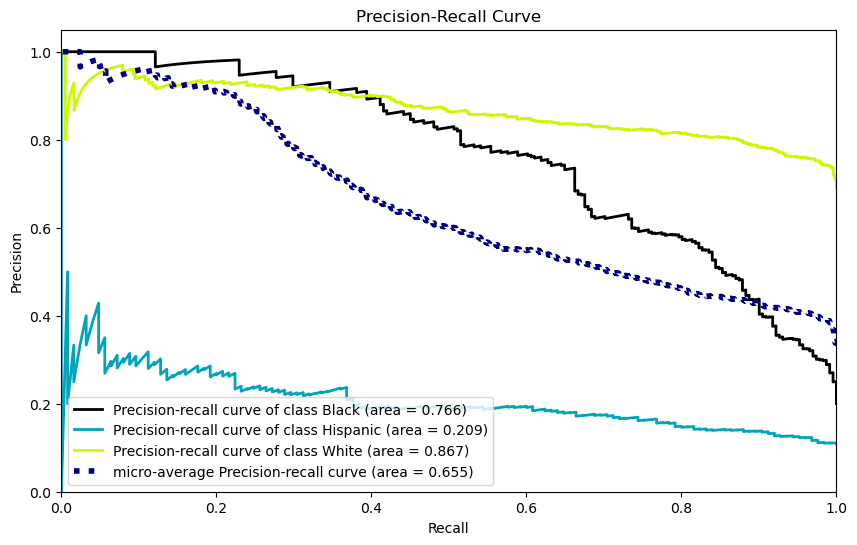

In [121]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=500, random_state=42
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [122]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.20945300003435408

In [123]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

In [125]:
from xgboost import XGBClassifier

### Vanilla XGBoost Model

In [137]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=42)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.

In [138]:
pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [139]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[203   2  26]
 [  7  54  64]
 [ 17  12 769]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       231
           1       0.79      0.43      0.56       125
           2       0.90      0.96      0.93       798

    accuracy                           0.89      1154
   macro avg       0.86      0.76      0.79      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[1067    0    0]
 [   0  554    0]
 [   0    0 2994]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1067
           1       1.00      1.00      1.00       554
           2       1.00      1.00      1.00      2994

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [140]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([1.44173696, 2.77677497, 0.51380539, ..., 0.51380539, 0.51380539,
       1.44173696])

In [141]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
2377,1.442,0
3471,2.777,1
2121,0.514,2
4399,0.514,2
4881,0.514,2


In [142]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights
0      1.442      1067
1      2.777       554
2      0.514      2994
dtype: int64

In [143]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [144]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[205   4  22]
 [  8  64  53]
 [ 21  25 752]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       231
           1       0.69      0.51      0.59       125
           2       0.91      0.94      0.93       798

    accuracy                           0.88      1154
   macro avg       0.82      0.78      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1067    0    0]
 [   0  554    0]
 [   0    0 2994]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1067
           1       1.00      1.00      1.00       554
           2       1.00      1.00      1.00      2994

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [145]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [146]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=42)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.681
train_precision_Hispanic   1.000
test_recall_Hispanic       0.417
train_recall_Hispanic      1.000
test_f1_Hispanic           0.517
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [147]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [148]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=42)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [149]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [150]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [151]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [152]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.567
mean_train_score   0.643
Name: 31, dtype: object

In [153]:
xgb_grid_model.best_score_

0.5668304668304669

In [154]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[180  32  19]
 [ 23  66  36]
 [ 91 217 490]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.69       231
           1       0.21      0.53      0.30       125
           2       0.90      0.61      0.73       798

    accuracy                           0.64      1154
   macro avg       0.57      0.64      0.57      1154
weighted avg       0.77      0.64      0.67      1154


Train_Set
[[ 817  148  102]
 [  67  353  134]
 [ 297  716 1981]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1067
           1       0.29      0.64      0.40       554
           2       0.89      0.66      0.76      2994

    accuracy                           0.68      4615
   macro avg       0.63      0.69      0.63      4615
weighted avg       0.77      0.68      0.71      4615



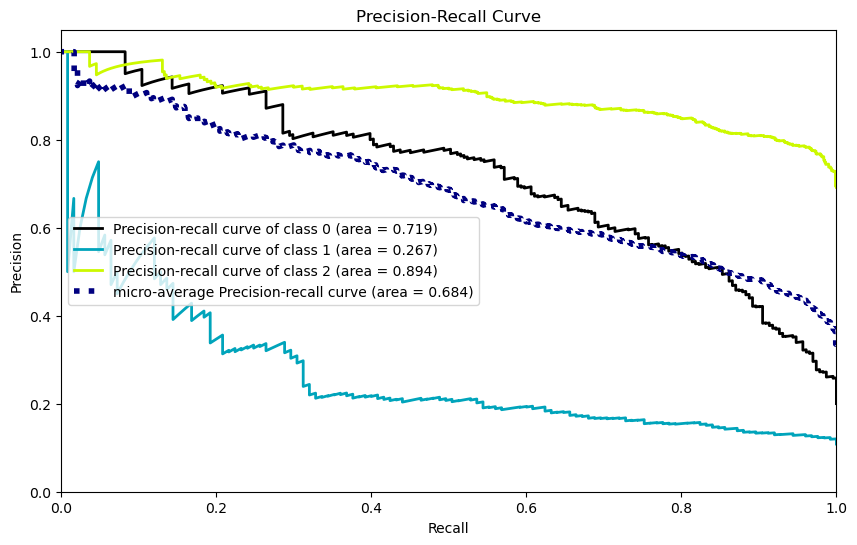

In [155]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=42,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [156]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [157]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.2671483333805927

In [158]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

##  Comparing Models

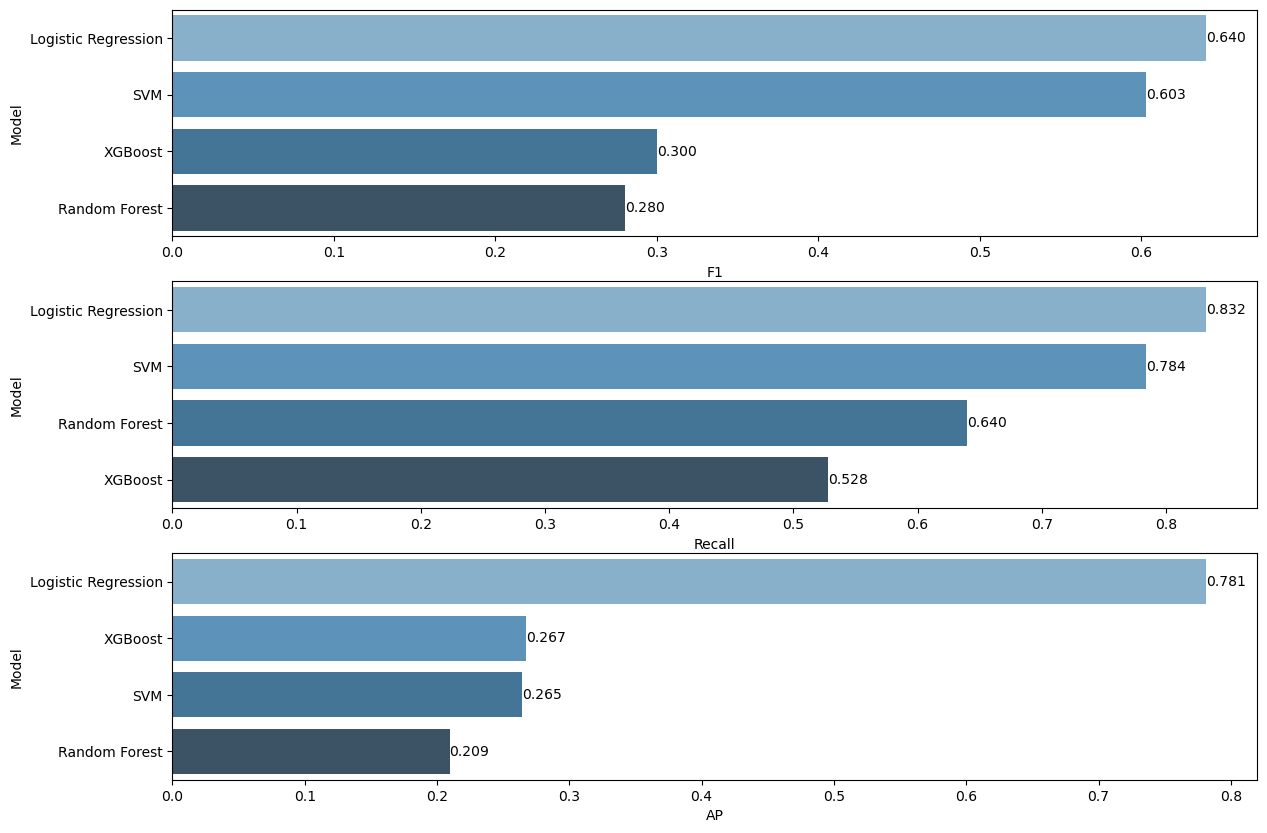

In [176]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

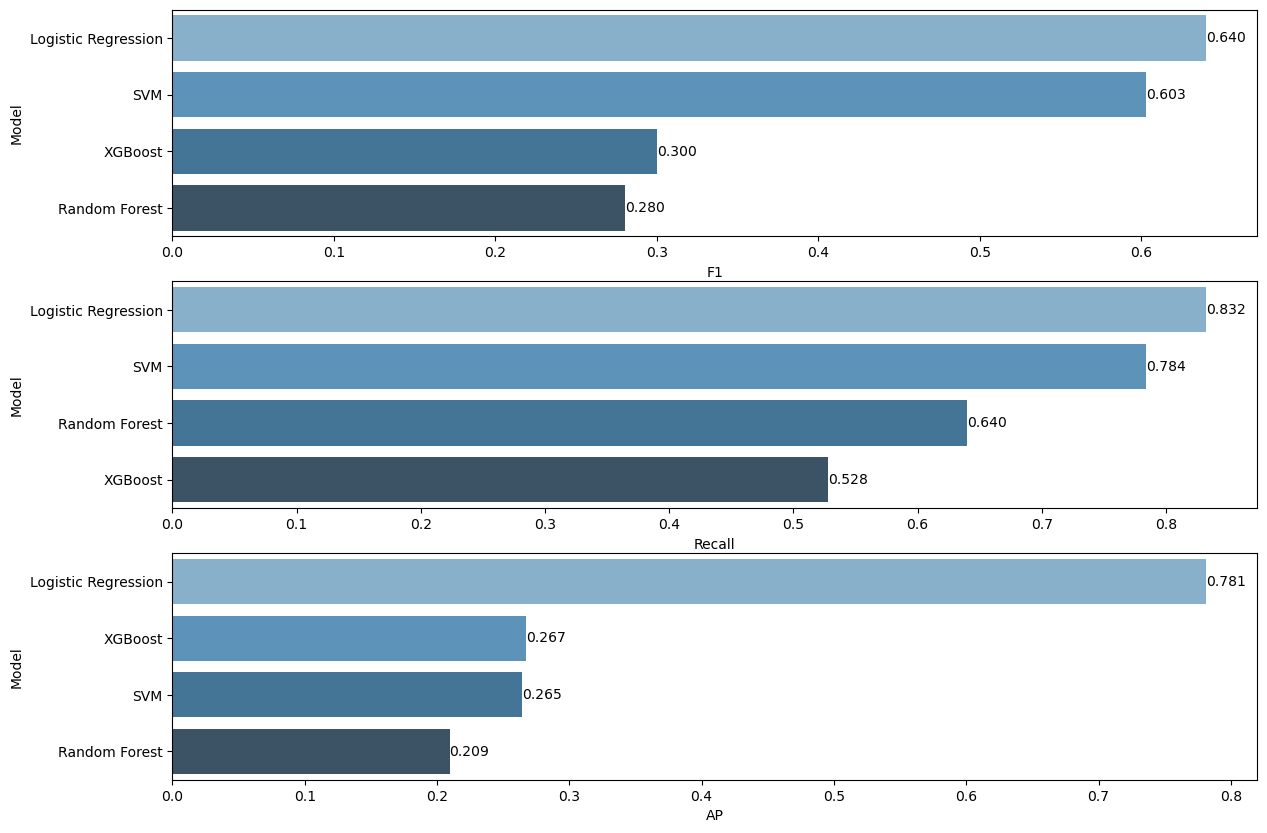

In [177]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)

plt.figure(figsize=(14, 10))
plt.subplot(311)
compare_f1 = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare_f1, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare_recall = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare_recall, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare_ap = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare_ap, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show()

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [178]:
!pip install imblearn

     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00


In [203]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [181]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
)

In [182]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [183]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [184]:
X_train_over.shape

(8982, 225)

In [185]:
y_train_over.value_counts()

# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

Black       2994
Hispanic    2994
White       2994
Name: DODRace, dtype: int64

In [186]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [187]:
X_train_under.shape

(1662, 225)

In [188]:
y_train_under.value_counts()

# As you can see, all classes after RandomUnderSampler are equal to the
# number of observations in the minority class hispanic.

# Equalizing or approximating the majority class to the minority class will
# result in a very serious loss of information of the observations in
# the majority class. Even if the scores improve, this improvement will only be
# an overestimate. For this reason, a 20%-30% reduction should be done from
# the Majority class. However, if there is still no improvement in the scores,
# this rate should not be increased further.

Black       554
Hispanic    554
White       554
Name: DODRace, dtype: int64

In [194]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [195]:
y_train.value_counts()

White       2994
Black       1067
Hispanic     554
Name: DODRace, dtype: int64

In [196]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [197]:
y_resampled_over.value_counts()

# With over, we doubled the number of observations in the Hispanic class.
# But we need to check below whether this increase causes overfitting.

White       2994
Black       1067
Hispanic    1000
Name: DODRace, dtype: int64

In [198]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [199]:
y_resampled_under.value_counts()
# We reduced the number of white observations by around 18% and equalized to 3000.

White       2500
Black       1067
Hispanic     554
Name: DODRace, dtype: int64

In [206]:
from imblearn.pipeline import Pipeline as imbpipeline
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [207]:
y_resampled.value_counts()

White       2500
Black       1067
Hispanic    1000
Name: DODRace, dtype: int64

In [208]:
y_train.value_counts()

White       2994
Black       1067
Hispanic     554
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

What does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) 

--> column_trans.fit_transform(X_train) #(Onehotencoder and minmaxscaler for numeric features)

--> over.fit_resample(X_train_transform, y_train) 
                                     
--> under.fit_resample(X_train_transform_over, y_train_over)

--> log_model.fit(X_train_transform_over_under, y_train_over_under)


for predict, over and under sumpling algortims do nothing for X_test.

smote_pipeline.predict(X_test)

--> column_trans.transform(X_test) #(Onehotoencoder and minmaxscaler for numeric features) 

--> log_model.predict(X_test_transform)

In [210]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
)

In [211]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=42)),
]  # ("scaler", MinMaxScaler())

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [212]:
smote_pipeline = imbpipeline(steps=operations)

In [213]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=42))])

In [214]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[208   3  20]
 [  7  91  27]
 [ 13  35 750]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       231
    Hispanic       0.71      0.73      0.72       125
       White       0.94      0.94      0.94       798

    accuracy                           0.91      1154
   macro avg       0.85      0.86      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 973   29   65]
 [  21  388  145]
 [  30  136 2828]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93      1067
    Hispanic       0.70      0.70      0.70       554
       White       0.93      0.94      0.94      2994

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



 The confusion matrix shows how well the model performs in predicting the true classes of the data
Test_Set:

The confusion matrix:

[[208   3  20]
 [  7  91  27]
 [ 13  35 750]]


Precision: Precision is a measure of how many true positive predictions were made compared to the total predicted positive instances. The weighted average precision for the three classes (Black, Hispanic, and White) are 0.91, 0.71, and 0.94, respectively.
Recall: Recall is a measure of how many true positive predictions were made compared to the total actual positive instances. The weighted average recall for the three classes are 0.90, 0.73, and 0.94, respectively.
F1-score: The F1-score is the harmonic mean of precision and recall. It is a measure that balances precision and recall. The weighted average F1-scores for the three classes are 0.91, 0.72, and 0.94, respectively.
Support: The support indicates the number of samples in each class in the test set.

Train_Set:

The confusion matrix:

[[ 973   29   65]
 [  21  388  145]
 [  30  136 2828]]
Precision: The weighted average precision for the three classes (Black, Hispanic, and White) are 0.95, 0.70, and 0.93, respectively.
Recall: The weighted average recall for the three classes are 0.91, 0.70, and 0.94, respectively.
F1-score: The weighted average F1-scores for the three classes are 0.93, 0.70, and 0.94, respectively.
Support: The support indicates the number of samples in each class in the training set.
Overall performance:

Accuracy: The accuracy is a measure of how many predictions the model got correct overall. For the test set, the accuracy is approximately 0.91 (91%), and for the training set, the accuracy is also approximately 0.91 (91%).
Macro avg: The macro-average is the average of the metrics (precision, recall, F1-score) for all classes without considering class imbalance. The macro-average F1-score for both the test and training set is approximately 0.86 (86%).
Weighted avg: The weighted average considers class imbalance by weighting each class's performance by its support (number of samples). The weighted average F1-score for both the test and training set is approximately 0.91 (91%).
In summary, the model seems to perform quite well on both the test set and training set with an overall accuracy of around 91%. However, it's always essential to consider other factors such as the business requirements, class imbalance, and the specific application domain when evaluating a model's performance. Additionally, to make a final judgment about the model, it's essential to consider other evaluation metrics and perform cross-validation to ensure the model's generalization performance.

In [215]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.651
train_precision_Hispanic   0.698
test_recall_Hispanic       0.657
train_recall_Hispanic      0.706
test_f1_Hispanic           0.651
train_f1_Hispanic          0.702
dtype: float64

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [216]:
from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7358493337405806

In [217]:
from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7271495013488767

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [219]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=42),
    ),
]

final_model = Pipeline(steps=operations_final)

In [220]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [221]:
X[X.Gender == "Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,...,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,...,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,30.172
std,37.295,62.357,17.281,14.579,58.714,12.894,10.329,19.075,34.512,17.512,...,27.662,34.680,111.463,34.730,29.361,51.599,141.507,8.855,41.139,8.835
min,163.000,1194.000,270.000,156.000,1106.000,186.000,156.000,337.000,246.000,219.000,...,383.000,232.000,648.000,161.000,293.000,876.000,393.000,149.000,695.000,18.000
25%,228.000,1401.000,324.000,220.000,1291.000,244.000,194.000,403.000,335.000,263.000,...,460.000,301.000,859.000,212.000,368.000,1023.000,760.000,170.000,820.000,23.000
50%,252.000,1441.000,335.000,229.000,1330.000,252.000,201.000,415.000,358.000,275.000,...,477.000,326.000,940.000,235.000,387.000,1057.000,849.000,176.000,848.000,28.000
75%,280.000,1483.000,347.000,239.000,1368.000,261.000,208.000,428.000,380.000,288.000,...,495.000,351.000,1018.000,261.000,407.000,1092.000,947.000,182.000,875.000,36.500
max,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,334.000,...,598.000,459.000,1379.000,406.000,494.000,1245.000,1442.000,216.000,1009.000,58.000


In [222]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
                                   ...   
wristheight                       848.762
Gender                                NaN
SubjectsBirthLocation                 NaN
Age                                30.172
WritingPreference                     NaN
Name: mean, Length: 97, dtype: object

In [223]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [224]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,...,238.560,388.017,1058.240,858.714,176.169,848.762,Male,California,30.172,Right hand


In [225]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

In [226]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)


0.7724546911251737

In [227]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7615206283463123

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___